<a href="https://colab.research.google.com/github/PRIMEADAWAS/CEB_Assignment/blob/main/ICU_datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt, seaborn as sns
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)
print('Matplotlib version :',mpl.__version__)

Pandas version : 1.5.3
Numpy version : 1.23.5
Matplotlib version : 3.7.1


In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Strip all strings in columns and dataframe

In [304]:
url = r'/content/drive/MyDrive/Dataset/ICUdatathon/icu_organ_datathon.xlsx'
df = pd.read_excel(url)
df.sample(5)

,Unnamed: 0,record_id,hn,age,sex,weight,height,bmi,pbw,h_adm,...,doa_28,surv_28,mort_90,doa_90,surv_90,mort_1y,doa_1y,surv_1y,cum_fluid,fluid_overload
396,397,423,3d5158b10531d3faddff6ae242d45a840a4f6d098f78df...,42,0,45.5,155.0,18.94,47.87,2015-04-18,...,2015-05-17,28,0,2015-07-18,90,0,2016-04-18,365,-2525.0,-5.07
248,249,266,6beaab6ced9c0a3a75e266428b40d62b8c5bf0398977f2...,72,0,45.6,150.0,20.27,43.32,2014-12-21,...,2015-01-18,28,0,2015-03-21,90,0,2015-12-21,365,-4456.0,-9.77
382,383,409,1eb6bf8e49178fc0cc9a65d76f9c673ccd8ffef87c2057...,74,0,49.0,160.0,19.14,52.42,2015-03-23,...,2015-04-12,9,1,2015-04-12,9,1,2015-04-12,9,8427.0,17.20
17,18,18,8ff921318ce87e4261fea67c06b4726dd284bc9028b31f...,53,0,47.0,165.0,17.26,56.97,2014-06-19,...,2014-07-02,13,1,2014-07-02,13,1,2014-07-02,13,32242.0,6.34
444,445,474,4069fc7552c78963eebc8f1dd630ac2e3d1d5881eb6b32...,16,1,55.0,180.0,16.98,75.12,2015-04-24,...,2015-06-21,26,1,2015-06-21,26,1,2015-06-21,26,-269.0,-1.26


the column Unnamed: 0 was not use

In [305]:
df.columns

Index(['Unnamed: 0', 'record_id', 'hn', 'age', 'sex', 'weight', 'height',
       'bmi', 'pbw', 'h_adm',
       ...
       'doa_28', 'surv_28', 'mort_90', 'doa_90', 'surv_90', 'mort_1y',
       'doa_1y', 'surv_1y', 'cum_fluid', 'fluid_overload'],
      dtype='object', length=121)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Columns: 121 entries, Unnamed: 0 to fluid_overload
dtypes: datetime64[ns](22), float64(36), int64(59), object(4)
memory usage: 421.7+ KB


In [307]:
# strip all columns
# df = df.rename(columns=lambda x: x.strip())
# strip all text data
# df = df.apply(lambda x: x.str.strip() if x.dtype.name == 'object' else x, axis=0)
# remove identity columns 0 ""
drop_list=[df.columns[0]]
df.drop(drop_list, inplace=True, axis=1)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Columns: 120 entries, record_id to fluid_overload
dtypes: datetime64[ns](22), float64(36), int64(58), object(4)
memory usage: 418.2+ KB


In [309]:
# urlSave = './icu_organ_20_strip.csv'
# df.to_csv(urlSave,
#            sep='|',
#            index=False,
#            encoding='utf-8')

# Download Strip Data

In [310]:
# url = './icu_organ_20_strip.csv'
# # df = pd.read_csv(url, sep=',',parse_dates=["h_adm"])
# df = pd.read_csv(url, sep='|')
# df.sample(5)

In [311]:
# df.info()
# df.dtypes

In [312]:
df.columns

Index(['record_id', 'hn', 'age', 'sex', 'weight', 'height', 'bmi', 'pbw',
       'h_adm', 'icu_adm',
       ...
       'doa_28', 'surv_28', 'mort_90', 'doa_90', 'surv_90', 'mort_1y',
       'doa_1y', 'surv_1y', 'cum_fluid', 'fluid_overload'],
      dtype='object', length=120)

convert to datetime datatype

In [313]:
# df['h_adm']=pd.to_datetime(df['h_adm'])
# df['icu_adm']=pd.to_datetime(df['icu_adm'])
# df['icu_dc']=pd.to_datetime(df['icu_dc'])
# df['h_dc']=pd.to_datetime(df['h_dc'])
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 120 columns):
 #    Column          Non-Null Count  Dtype         
---   ------          --------------  -----         
 0    record_id       446 non-null    int64         
 1    hn              446 non-null    object        
 2    age             446 non-null    int64         
 3    sex             446 non-null    int64         
 4    weight          446 non-null    float64       
 5    height          428 non-null    float64       
 6    bmi             428 non-null    float64       
 7    pbw             428 non-null    float64       
 8    h_adm           446 non-null    datetime64[ns]
 9    icu_adm         446 non-null    datetime64[ns]
 10   icu_dc          446 non-null    datetime64[ns]
 11   h_dc            446 non-null    datetime64[ns]
 12   reason___1      446 non-null    int64         
 13   reason___2      446 non-null    int64         
 14   reason___3      446 non-null    int64   

# Check and drop duplicate

check HN duplicate

In [246]:
df['hn']

0      3ed8248cd3a3fabd75a4a1ee968ab0b7147fd6bb57e2d4...
1      7844a1de1440e08e1e4462c1f3f0052a23ffb022c93ef9...
2      6c5924c5bbe9bdfc84a167a0795781f7f2452a82fa396f...
3      0579c5943b39ef79bde8e8daf39fa6b6584496bb4edf5c...
4      799d9834c6ce0fe327ec9ffb3a67933c0d4ac6d7c2c9fe...
                             ...                        
441    8587c20416b9a579b07787319b09a81ddbd0bb4fab6ff4...
442    7a48e813262ea71fb4f00fa083d8836e9e7f10055894d0...
443    97c242b1704d8f0a2bfdfec2a027a97c0bad90d071d793...
444    4069fc7552c78963eebc8f1dd630ac2e3d1d5881eb6b32...
445    4f5ede888565b782d71f5c797860b765663515746edc31...
Name: hn, Length: 446, dtype: object

In [247]:
df['hn'].duplicated().sum()

0

In [248]:
df.duplicated().sum()

0

In [249]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Perform data preprocessing, imputation, or delete incomplete sample

find null value, calculate missingness by count number and percentages

In [314]:
df.isnull().values.any(), df.isnull().sum().sum()

(True, 12143)

In [315]:
def printCountNullValue():
  # df.isnull().sum(), df.isnull().mean()*100
  for col in df.columns:
      if(df[col].isnull().sum() > 0):
          print('{0:15s} : {1:5d} ({2:4.2f} %)'.format(col, df[col].isnull().sum(), (df[col].isnull().sum())/len(df)*100))
printCountNullValue()

height          :    18 (4.04 %)
bmi             :    18 (4.04 %)
pbw             :    18 (4.04 %)
arf_af          :   244 (54.71 %)
arf_date        :   390 (87.44 %)
int_num         :   133 (29.82 %)
int_date_1      :   133 (29.82 %)
ext_date_1      :   133 (29.82 %)
int_date_2      :   412 (92.38 %)
ext_date_2      :   412 (92.38 %)
int_date_3      :   442 (99.10 %)
ext_date_3      :   442 (99.10 %)
int_date_4      :   444 (99.55 %)
ext_date_4      :   444 (99.55 %)
int_date_5      :   446 (100.00 %)
ext_date_5      :   446 (100.00 %)
niv             :     2 (0.45 %)
vae             :   133 (29.82 %)
vae_onset       :   405 (90.81 %)
tsc_growth      :   135 (30.27 %)
organism_num    :   434 (97.31 %)
tsc_result_1    :   434 (97.31 %)
tsc_result_2    :   446 (100.00 %)
tsc_result_3    :   446 (100.00 %)
last_assist     :   133 (29.82 %)
mv_duration     :   133 (29.82 %)
aki             :    57 (12.78 %)
aki_onset       :   168 (37.67 %)
aki_stage       :   168 (37.67 %)
crrt_duration 

In [316]:
npdisplay = np.stack([df.isnull().sum(),df.isnull().mean()*100],axis=1)
nulldf = pd.DataFrame(npdisplay,columns = ['Sum_Null','% Null'], index=df.columns)

def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: green' if is_max.any() else '' for v in is_max]

nulldf.style.apply(highlight_greaterthan, threshold=50.00, column=['% Null'], axis=1)

,Sum_Null,% Null
record_id,0.000000,0.000000
hn,0.000000,0.000000
age,0.000000,0.000000
sex,0.000000,0.000000
weight,0.000000,0.000000
height,18.000000,4.035874
bmi,18.000000,4.035874
pbw,18.000000,4.035874
h_adm,0.000000,0.000000
icu_adm,0.000000,0.000000


### Generate visual representations of missingness in data.
In the matrix view below, the missing values represent with white lines , but for non-missing values show in black lines.

<Axes: >

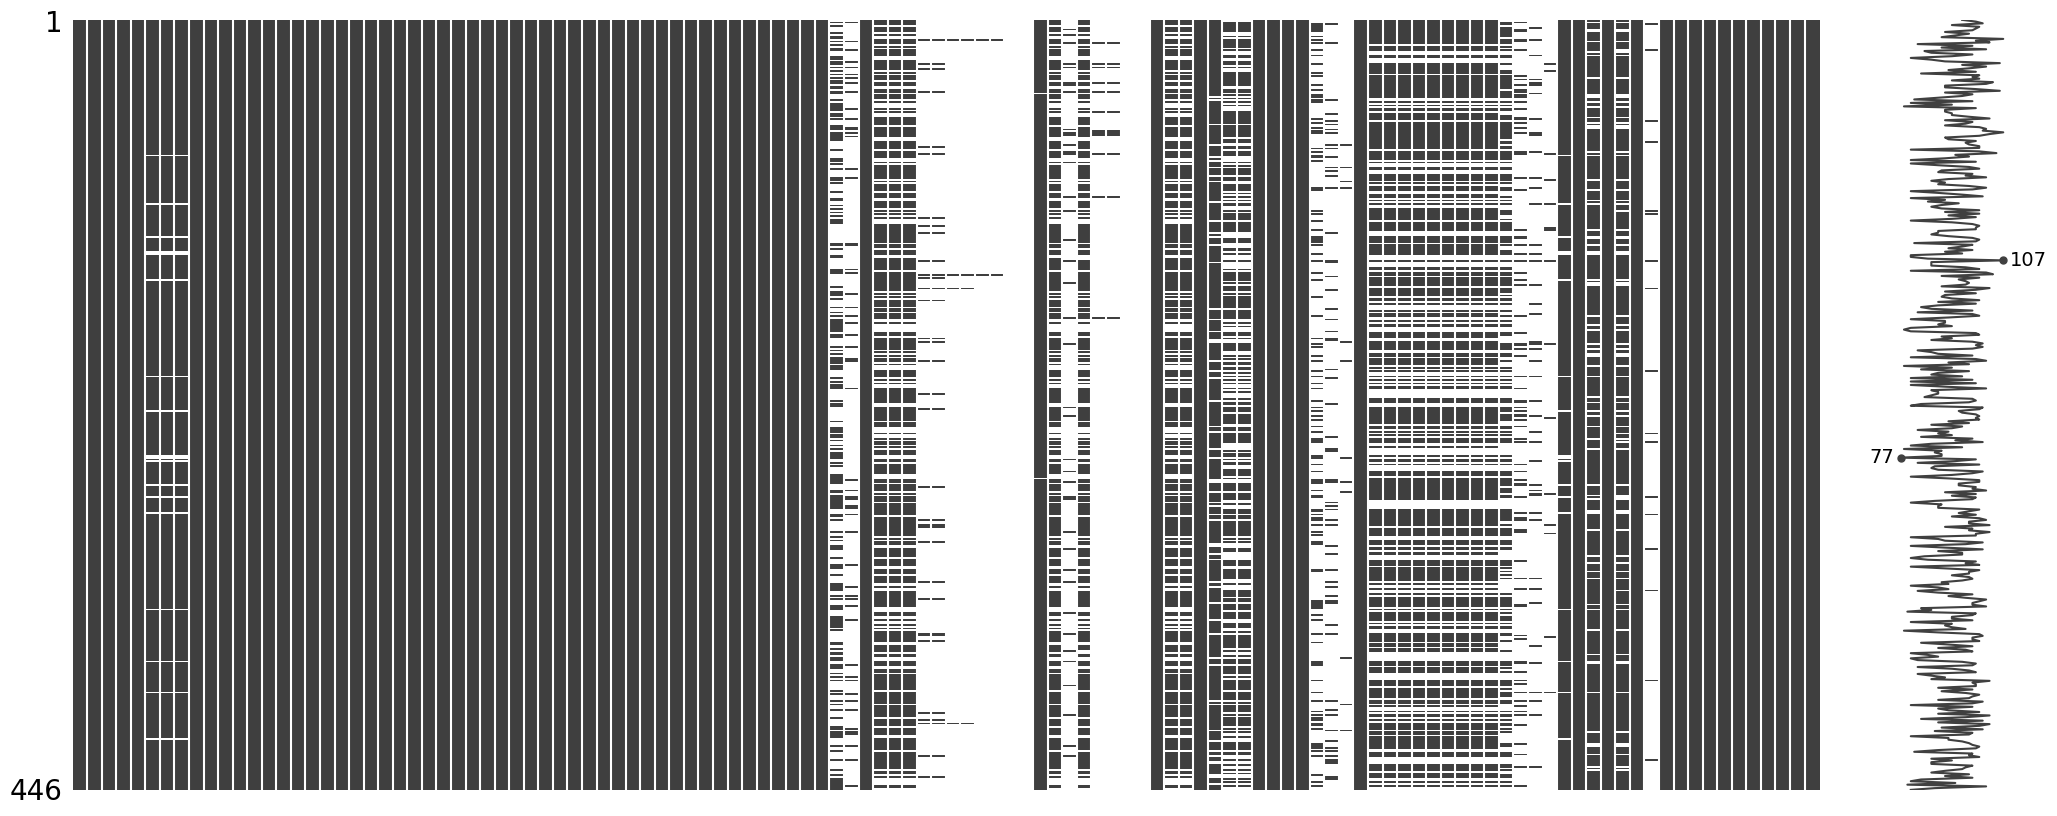

In [317]:
import missingno as msno
msno.matrix(df)

#### Explore and replace true missing NA mean zero

<Axes: >

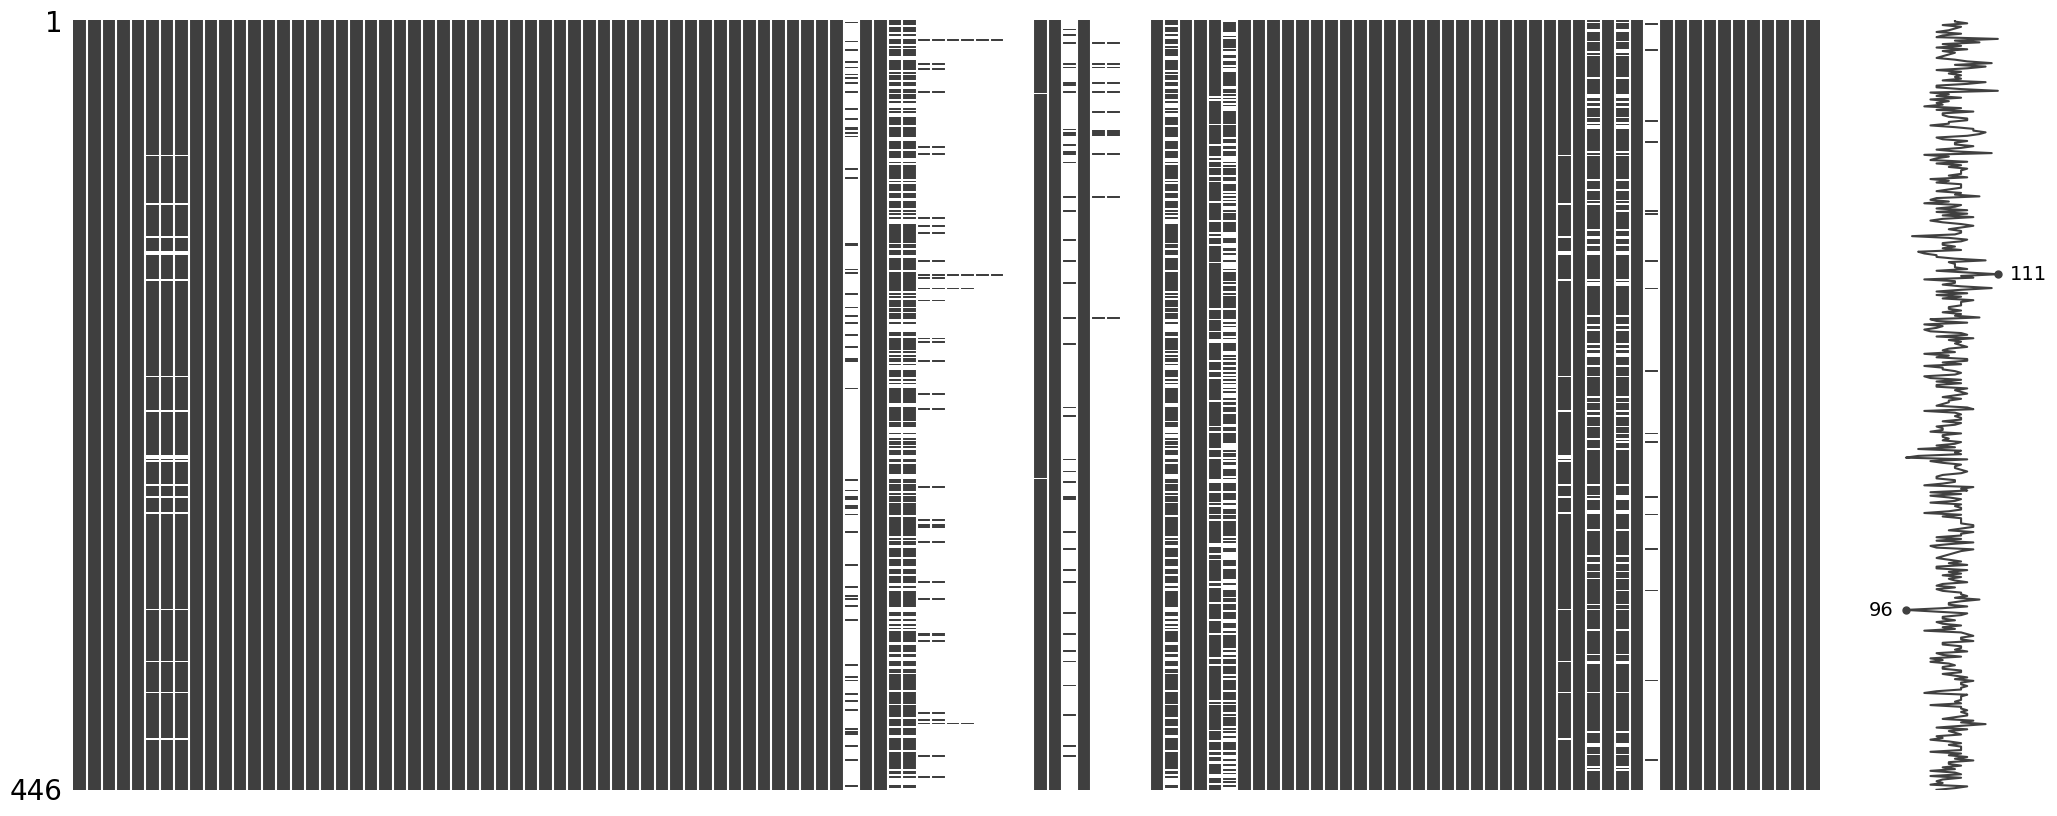

In [318]:
# imputation with fix 0 values to intension 'NA'
imputeFixVal = ['arf_af', 'int_num', 'vae', 'tsc_growth', 'mv_duration', 'aki_stage', 'crrt_duration', 'hd_duration', 'pd_duration', 'hypo_shock', 'septic_shock', 'cardio_shock', 'obs_shock', 'ad_shock', 'norepi', 'epi', 'dopa', 'dobu', 'epi_dose', 'norepi_dose', 'dopa_dose', 'dobu_dose']
df[imputeFixVal] = df[imputeFixVal].fillna(0)
msno.matrix(df)

get columns with dtype datetime

In [319]:
# get datetime dtype columns
datetimeCol = df.select_dtypes(['datetime64[ns]']).columns
datetimeCol

Index(['h_adm', 'icu_adm', 'icu_dc', 'h_dc', 'arf_date', 'int_date_1',
       'ext_date_1', 'int_date_2', 'ext_date_2', 'int_date_3', 'ext_date_3',
       'int_date_4', 'ext_date_4', 'vae_onset', 'last_assist', 'aki_onset',
       'nut_start', 'en_start', 'pn_start', 'doa_28', 'doa_90', 'doa_1y'],
      dtype='object')

In [320]:
npdisplay = np.stack([df.isnull().sum(),df.isnull().mean()*100],axis=1)
nulldf = pd.DataFrame(npdisplay,columns = ['Sum_Null','% Null'], index=df.columns)

def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: green' if is_max.any() else '' for v in is_max]

nulldf.style.apply(highlight_greaterthan, threshold=50.00, column=['% Null'], axis=1)

,Sum_Null,% Null
record_id,0.000000,0.000000
hn,0.000000,0.000000
age,0.000000,0.000000
sex,0.000000,0.000000
weight,0.000000,0.000000
height,18.000000,4.035874
bmi,18.000000,4.035874
pbw,18.000000,4.035874
h_adm,0.000000,0.000000
icu_adm,0.000000,0.000000


### Remove columns that contain null value more than half

In [321]:
drop_list = nulldf[nulldf['% Null'] >= 50.0].index
drop_list

Index(['arf_date', 'int_date_2', 'ext_date_2', 'int_date_3', 'ext_date_3',
       'int_date_4', 'ext_date_4', 'int_date_5', 'ext_date_5', 'vae_onset',
       'organism_num', 'tsc_result_1', 'tsc_result_2', 'tsc_result_3',
       'pn_start'],
      dtype='object')

In [322]:
# df = df[df.columns.difference(['durinjm','stopinjm','agedm'])]
# drop_list=['agedm','stophrtm','durhrtm','stopocm','durocm','durinjm','stopinjm']
df.drop(drop_list, inplace=True, axis=1)
df.isnull().values.any(), df.isnull().sum().sum()

(True, 842)

display columns after drop

<Axes: >

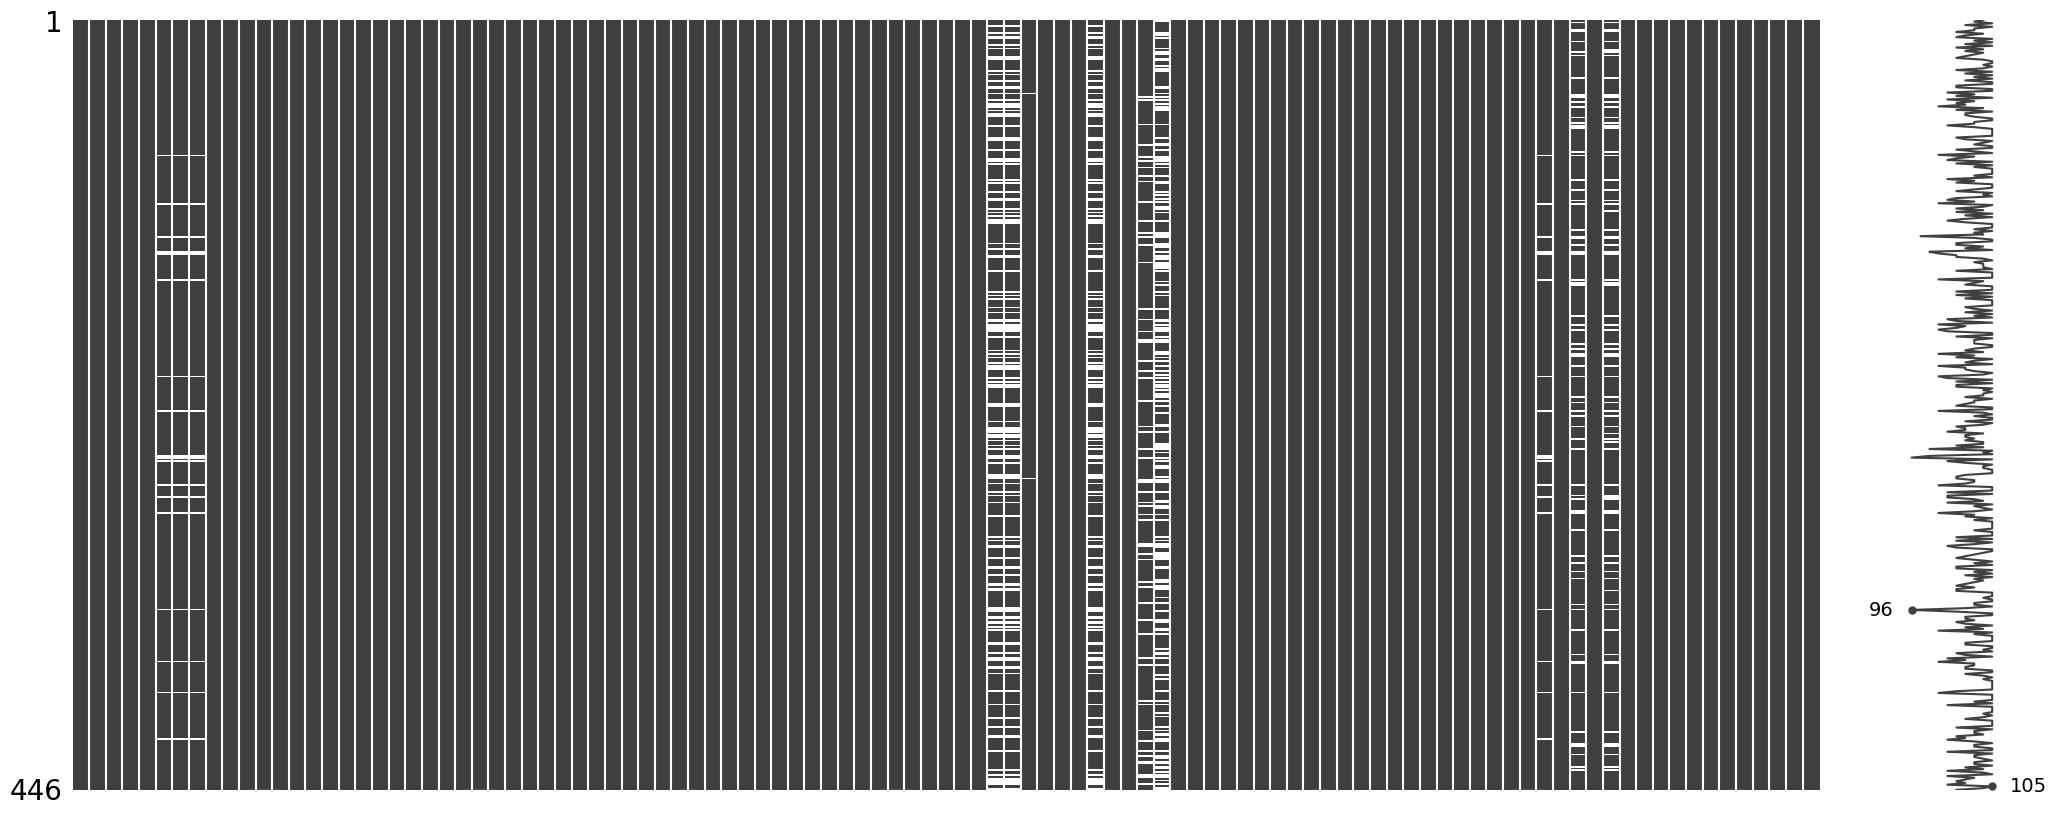

In [323]:
msno.matrix(df)

In [324]:
len(df.columns), df.columns

(105,
 Index(['record_id', 'hn', 'age', 'sex', 'weight', 'height', 'bmi', 'pbw',
        'h_adm', 'icu_adm',
        ...
        'doa_28', 'surv_28', 'mort_90', 'doa_90', 'surv_90', 'mort_1y',
        'doa_1y', 'surv_1y', 'cum_fluid', 'fluid_overload'],
       dtype='object', length=105))

In [325]:
printCountNullValue()

height          :    18 (4.04 %)
bmi             :    18 (4.04 %)
pbw             :    18 (4.04 %)
int_date_1      :   133 (29.82 %)
ext_date_1      :   133 (29.82 %)
niv             :     2 (0.45 %)
last_assist     :   133 (29.82 %)
aki             :    57 (12.78 %)
aki_onset       :   168 (37.67 %)
energy_require  :    18 (4.04 %)
nut_start       :    69 (15.47 %)
en_start        :    75 (16.82 %)


# Imputaion null value

sex : 0, Female | 1, Male

### For male

In [261]:
# male missing value numbers
df[df['sex'] == 1]['height'].isnull().sum()

10

In [262]:
# male height mean
df[df['sex'] == 1]['height'].mean()

165.728

### For female

In [263]:
# female missing value numbers
df[df['sex'] == 0]['height'].isnull().sum()

8

In [264]:
# female height mean
df[df['sex'] == 0]['height'].mean()

154.46629213483146

In [265]:
# sex = 0 female
df.loc[range(77,80),'height']

77    177.0
78      NaN
79    160.0
Name: height, dtype: float64

In [266]:
# sex = 1 male
df.loc[range(124,127),'height']

124    168.0
125      NaN
126    145.0
Name: height, dtype: float64

fill na with mean value groupby sex

In [329]:
df['height'] = df['height'].fillna(df.groupby(['sex'])['height'].transform('mean'))

In [330]:
df.loc[range(77,80),['height','weight','bmi']]

,height,weight,bmi
77,177.000000,42.3,13.50
78,154.466292,60.0,NaN
79,160.000000,60.3,23.55


In [331]:
df.loc[range(124,127),['height','weight','bmi']]

,height,weight,bmi
124,168.000,60.0,21.26
125,165.728,65.0,NaN
126,145.000,50.0,23.78


In [332]:
df['height'].isnull().sum()

0

In [333]:
# update new bmi calculation round by 2 floating
df['bmi'] = round(df['weight'] / (df['height']/100) ** 2,2)

In [334]:
df.loc[range(77,80),['height','weight','bmi']]

,height,weight,bmi
77,177.000000,42.3,13.50
78,154.466292,60.0,25.15
79,160.000000,60.3,23.55


In [335]:
df.loc[range(124,127),['height','weight','bmi']]

,height,weight,bmi
124,168.000,60.0,21.26
125,165.728,65.0,23.67
126,145.000,50.0,23.78


In [274]:
# def bmicheck(bmi):
#   if(bmi > 25):
#     return 'fat'
#   elif(bmi > 20):
#     return 'ok'
#   else:
#     return 'thin'

In [275]:
# df['Obese'] = df['bmi'].apply(bmicheck)

In [276]:
# from sklearn.impute import SimpleImputer

# # # imputation with fix values
# # # imputeFixVal = ['arf_af', 'int_num', 'vae', 'tsc_growth', 'mv_duration', 'aki_stage', 'crrt_duration', 'hd_duration', 'pd_duration', 'hypo_shock', 'septic_shock', 'cardio_shock', 'obs_shock', 'ad_shock', 'norepi', 'epi', 'dopa', 'dobu', 'epi_dose', 'norepi_dose', 'dopa_dose', 'dobu_dose']
# # imputeFixVal = ['hypo_shock', 'septic_shock', 'cardio_shock', 'obs_shock', 'ad_shock', 'norepi', 'epi', 'dopa', 'dobu']
# # df[imputeFixVal] = df[imputeFixVal].fillna(0)

# # Mean Imputation
# mean_imputer = SimpleImputer(strategy='mean')
# # Mode Imputation
# mode_imputer = SimpleImputer(strategy='most_frequent')

# # imputation 2 column with mean value
# # df['agechild'] = mean_imputer.fit_transform(df['agechild'].values.reshape(-1,1))
# # df['agemeno'] = mean_imputer.fit_transform(df['agemeno'].values.reshape(-1,1))

# # imputation with mode value
# # df['menonat'] = mode_imputer.fit_transform(df['menonat'].values.reshape(-1,1))

# df.isnull().values.any(), df.isnull().sum().sum()

In [336]:
printCountNullValue()

pbw             :    18 (4.04 %)
int_date_1      :   133 (29.82 %)
ext_date_1      :   133 (29.82 %)
niv             :     2 (0.45 %)
last_assist     :   133 (29.82 %)
aki             :    57 (12.78 %)
aki_onset       :   168 (37.67 %)
energy_require  :    18 (4.04 %)
nut_start       :    69 (15.47 %)
en_start        :    75 (16.82 %)


### Exclusion columns

In [337]:
df.columns

Index(['record_id', 'hn', 'age', 'sex', 'weight', 'height', 'bmi', 'pbw',
       'h_adm', 'icu_adm',
       ...
       'doa_28', 'surv_28', 'mort_90', 'doa_90', 'surv_90', 'mort_1y',
       'doa_1y', 'surv_1y', 'cum_fluid', 'fluid_overload'],
      dtype='object', length=105)

get avialable datetime columns

In [341]:
datetimeCol = df.select_dtypes(['datetime64[ns]']).columns
datetimeCol

Index(['h_adm', 'icu_adm', 'icu_dc', 'h_dc', 'int_date_1', 'ext_date_1',
       'last_assist', 'aki_onset', 'nut_start', 'en_start', 'doa_28', 'doa_90',
       'doa_1y'],
      dtype='object')

In [343]:
# drop_list = [col for col in df.columns if col not in useColumns]
multiColinearlity = ['weight', 'height', 'pbw', 'sofa', 'mv', 'niv', 'aki', 'shock', 'norepi', 'epi', 'dopa', 'dobu', 'enteral', 'parenteral']
# 'pdx', 'icd10_pdx',
# 'rrt___0',
# 'dopa_dose', 'dobu_dose'
drop_list = ['h_adm', 'icu_adm', 'icu_dc', 'h_dc',
             'reason___1', 'reason___2', 'reason___3', 'reason___4', 'reason___5', 'reason___6', 'reason___7', 'reason___8', 'reason___9',
             'pdx', 'icd10_pdx', 'icu_mort', 'h_mort',
             'cci_table___1', 'cci_table___2', 'cci_table___3', 'cci_table___4', 'cci_table___5', 'cci_table___6', 'cci_table___7', 'cci_table___8', 'cci_table___9', 'cci_table___10', 'cci_table___11', 'cci_table___12', 'cci_table___13', 'cci_table___14', 'cci_table___15', 'cci_table___16', 'cci_table___17', 'cci_table___18', 'cci_table___19', 'cci_table___0',
             'int_date_1', 'ext_date_1', 'uab', 'last_assist',
             'aki_onset', 'rrt___0', 'rrt___1', 'rrt___2', 'rrt___3', 'pd_duration',
             'dopa_dose', 'dobu_dose', 'energy_require',
             'nut_start', 'en_start']
drop_list.extend(datetimeCol)
drop_list.extend(multiColinearlity)
df.drop(drop_list, inplace=True, axis=1)

### Drop some null value data from use columns

In [345]:
printCountNullValue()

In [346]:
df.shape

(446, 36)

In [347]:
df.dropna(inplace=True)
df

,record_id,hn,age,sex,bmi,location_bf,apache,icu_los,h_los,cci_total,...,epi_dose,nut_supp,mort_28,surv_28,mort_90,surv_90,mort_1y,surv_1y,cum_fluid,fluid_overload
0,1,3ed8248cd3a3fabd75a4a1ee968ab0b7147fd6bb57e2d4...,48,0,24.26,2,14,10,34,0,...,0.000,1,0,28,0,90,0,365,-11101.0,-18.56
1,2,7844a1de1440e08e1e4462c1f3f0052a23ffb022c93ef9...,85,0,17.78,1,41,1,1,6,...,1.830,0,1,1,1,1,1,1,4863.0,12.16
2,3,6c5924c5bbe9bdfc84a167a0795781f7f2452a82fa396f...,39,0,25.12,6,20,20,85,0,...,0.000,1,0,28,0,90,0,365,-4833.0,-7.61
3,4,0579c5943b39ef79bde8e8daf39fa6b6584496bb4edf5c...,66,0,22.48,1,23,3,5,3,...,0.000,1,0,28,0,90,0,365,-1777.0,0.03
4,5,799d9834c6ce0fe327ec9ffb3a67933c0d4ac6d7c2c9fe...,52,0,25.81,2,29,27,105,5,...,0.000,1,1,27,1,27,1,27,14827.0,23.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,471,8587c20416b9a579b07787319b09a81ddbd0bb4fab6ff4...,71,1,25.24,1,23,4,9,6,...,0.000,1,0,28,0,90,1,134,-3457.0,-5.35
442,472,7a48e813262ea71fb4f00fa083d8836e9e7f10055894d0...,58,1,26.29,1,12,2,7,9,...,0.000,1,0,28,0,90,0,365,-4312.0,-6.25
443,473,97c242b1704d8f0a2bfdfec2a027a97c0bad90d071d793...,67,1,22.96,2,29,7,19,5,...,2.186,1,1,7,1,7,1,7,12048.0,-1.88
444,474,4069fc7552c78963eebc8f1dd630ac2e3d1d5881eb6b32...,16,1,16.98,2,18,2,58,6,...,0.000,1,1,26,1,26,1,26,-269.0,-1.26


In [348]:
df.describe()

,record_id,age,sex,bmi,location_bf,apache,icu_los,h_los,cci_total,arf_bf,...,epi_dose,nut_supp,mort_28,surv_28,mort_90,surv_90,mort_1y,surv_1y,cum_fluid,fluid_overload
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,...,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,237.329596,58.448430,0.582960,21.957982,2.524664,24.390135,9.372197,24.121076,4.360987,0.565022,...,0.235442,0.845291,0.307175,22.688341,0.423767,60.878924,0.538117,198.491031,5068.353049,4.912197
std,138.594409,18.853445,0.493623,4.383480,1.862238,9.241348,12.779743,27.278977,2.842250,0.496311,...,0.671994,0.362033,0.461841,9.440967,0.494709,36.605134,0.499105,164.311799,7118.138149,9.286542
min,1.000000,16.000000,0.000000,12.580000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-20991.000000,-18.560000
25%,115.500000,46.000000,0.000000,18.777500,1.000000,18.000000,3.000000,7.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,21.000000,0.000000,21.000000,0.000000,21.000000,319.250000,0.267500
50%,239.500000,60.000000,1.000000,21.715000,2.000000,23.000000,5.000000,15.000000,4.000000,1.000000,...,0.000000,1.000000,0.000000,28.000000,0.000000,90.000000,1.000000,200.000000,3718.000000,2.170000
75%,357.750000,73.000000,1.000000,24.255000,3.000000,30.000000,12.000000,31.000000,6.000000,1.000000,...,0.000000,1.000000,1.000000,28.000000,1.000000,90.000000,1.000000,365.000000,8030.500000,6.600000
max,477.000000,97.000000,1.000000,42.870000,6.000000,53.000000,168.000000,259.000000,14.000000,1.000000,...,5.000000,1.000000,1.000000,46.000000,1.000000,90.000000,1.000000,365.000000,35842.000000,71.680000


### useColumns and predictColums



In [349]:
# 'pdx', 'rrt___0' , 'pd_duration', 'dopa_dose', 'dobu_dose'
useColumns = ['age', 'sex', 'bmi', 'location_bf', 'apache', 'cci_total',
       'arf_bf', 'arf_af', 'int_num', 'vae', 'tsc_growth', 'mv_duration',
       'aki_stage', 'crrt_duration', 'hd_duration',
       'hypo_shock', 'septic_shock', 'cardio_shock', 'obs_shock', 'ad_shock',
       'epi_dose', 'norepi_dose',
       'nut_supp', 'cum_fluid', 'fluid_overload']
df[useColumns]

,age,sex,bmi,location_bf,apache,cci_total,arf_bf,arf_af,int_num,vae,...,hypo_shock,septic_shock,cardio_shock,obs_shock,ad_shock,epi_dose,norepi_dose,nut_supp,cum_fluid,fluid_overload
0,48,0,24.26,2,14,0,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.000,0.000,1,-11101.0,-18.56
1,85,0,17.78,1,41,6,0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.830,0.590,0,4863.0,12.16
2,39,0,25.12,6,20,0,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.000,0.042,1,-4833.0,-7.61
3,66,0,22.48,1,23,3,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000,0.000,1,-1777.0,0.03
4,52,0,25.81,2,29,5,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.000,0.450,1,14827.0,23.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,71,1,25.24,1,23,6,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000,0.020,1,-3457.0,-5.35
442,58,1,26.29,1,12,9,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,1,-4312.0,-6.25
443,67,1,22.96,2,29,5,0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.186,0.695,1,12048.0,-1.88
444,16,1,16.98,2,18,6,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,1,-269.0,-1.26


In [350]:
len(useColumns)

25

In [585]:
# predictColums = ['icu_los', 'h_los', 'vfd_28', 'mort_28',
#        'doa_28', 'surv_28', 'mort_90', 'doa_90', 'surv_90', 'mort_1y',
#        'doa_1y', 'surv_1y']
# 0, Alive | 1, Death
predictColums = 'mort_28'
df[predictColums]

0      27
1       0
2      17
3      28
4       0
       ..
441    28
442    28
443     0
444     0
445    28
Name: vfd_28, Length: 446, dtype: int64

### Visualization

In [286]:
# dfVisualization = df[['age', 'sex', 'bmi', 'apache',
#        'arf_bf', 'arf_af', 'mv', 'int_num', 'niv', 'vae', 'cci_total',
#        'tsc_growth', 'mv_duration', 'aki',  'aki_stage', 'shock', 'hypo_shock', 'septic_shock', 'cardio_shock', 'obs_shock',
#        'ad_shock', 'norepi', 'epi', 'dopa', 'dobu', 'energy_require',
#        'nut_supp', 'enteral', 'parenteral', 'cum_fluid', 'fluid_overload',
#        'icu_los', 'h_los', 'vfd_28', 'mort_28', 'surv_28', 'mort_90', 'surv_90', 'mort_1y', 'surv_1y']]

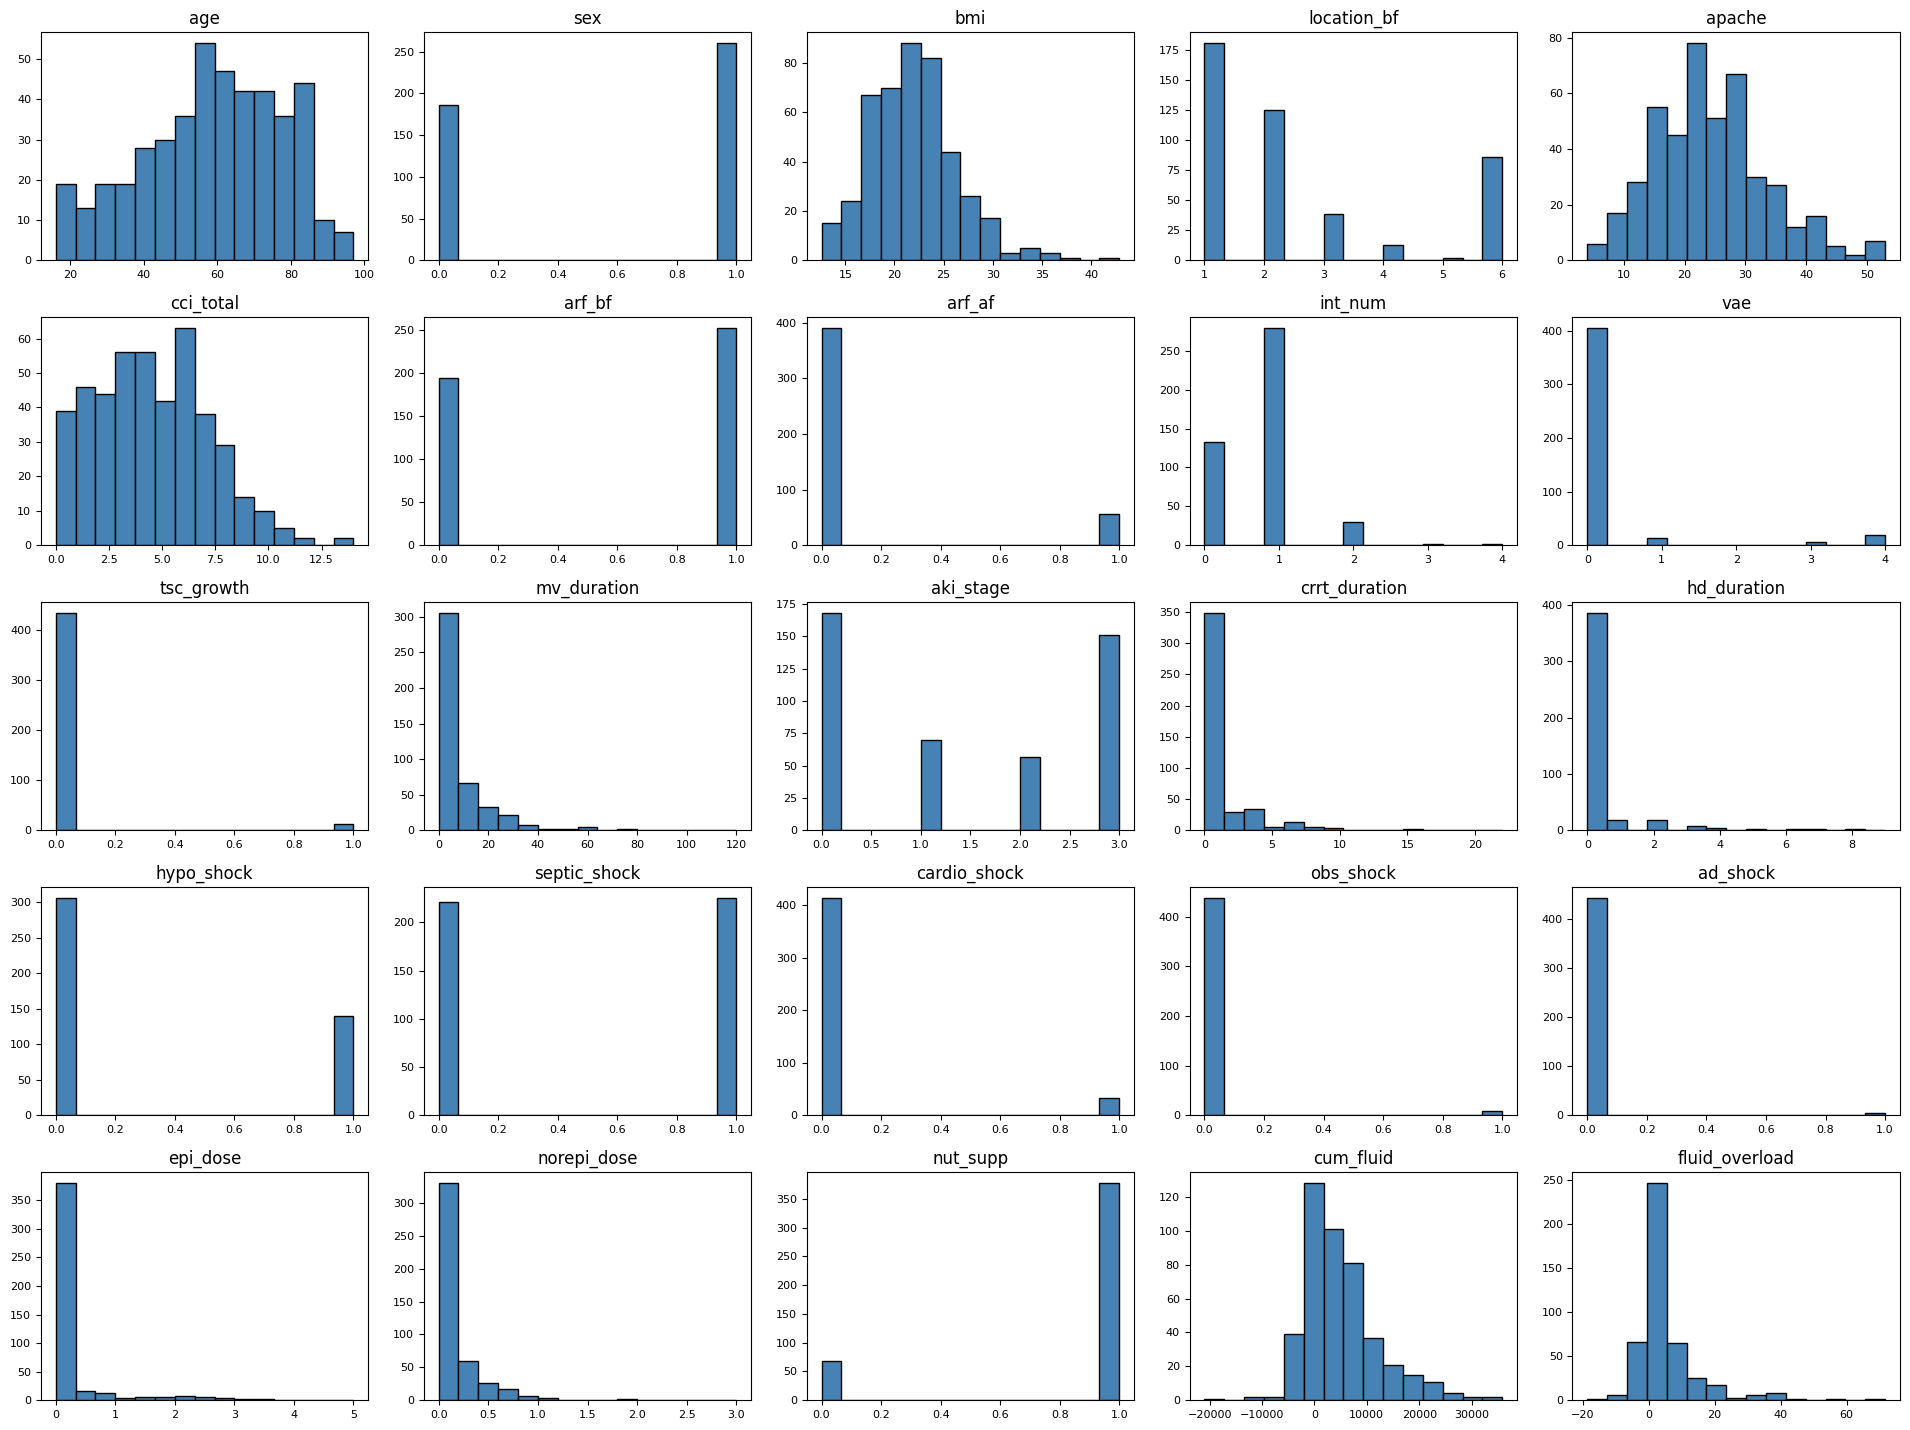

In [356]:
df[useColumns].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 3, 3))

In [288]:
# df2 = df.dropna()
# colors = df2["surv_28"].map(lambda x: "#44d9ff" if x < 28 else "#f95b4a")
# pd.plotting.scatter_matrix(df2, figsize=(15,15), color=colors);

Correlation plot

<ipython-input-355-96b099760102>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="rainbow")


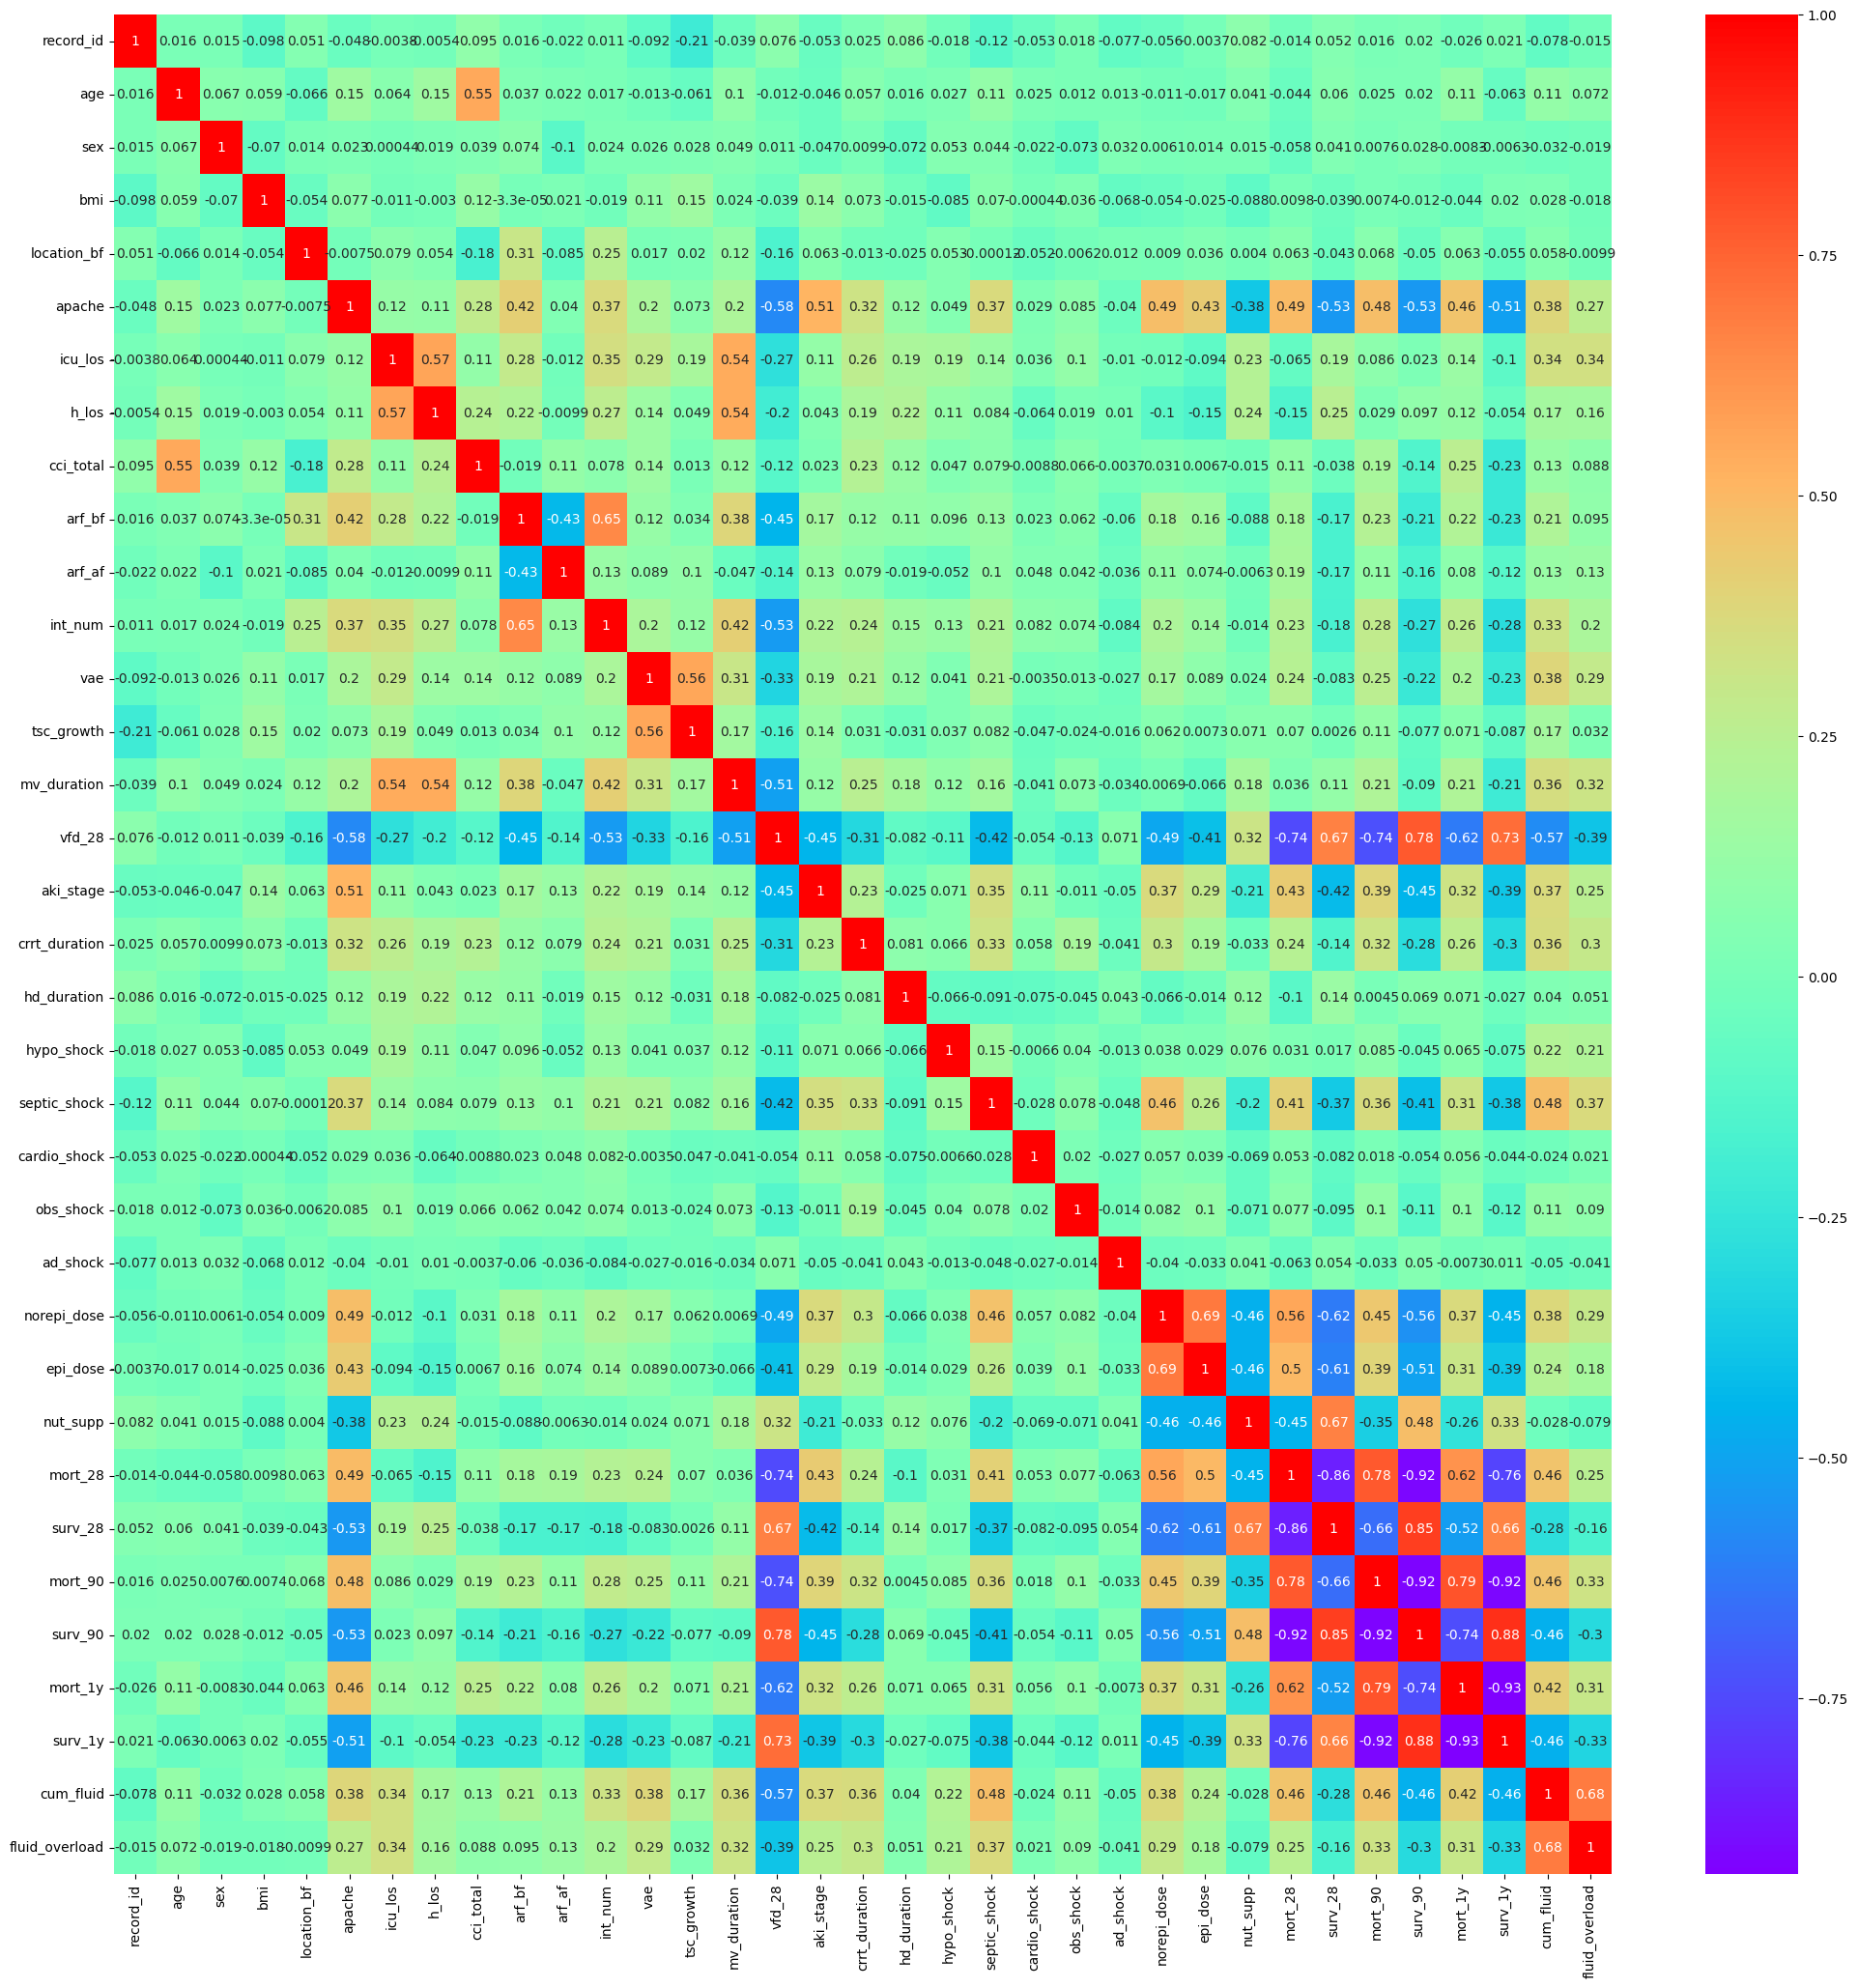

In [355]:
# plt.figure(figsize = (10,5))
plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [290]:
## It was already converted all 'object' column type to 'category' then encoding
# df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category').cat.codes)

In [357]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_id       446 non-null    int64  
 1   hn              446 non-null    object 
 2   age             446 non-null    int64  
 3   sex             446 non-null    int64  
 4   bmi             446 non-null    float64
 5   location_bf     446 non-null    int64  
 6   apache          446 non-null    int64  
 7   icu_los         446 non-null    int64  
 8   h_los           446 non-null    int64  
 9   cci_total       446 non-null    int64  
 10  arf_bf          446 non-null    int64  
 11  arf_af          446 non-null    float64
 12  int_num         446 non-null    float64
 13  vae             446 non-null    float64
 14  tsc_growth      446 non-null    float64
 15  mv_duration     446 non-null    float64
 16  vfd_28          446 non-null    int64  
 17  aki_stage       446 non-null    flo

(446, 36)

## asign value to X , y

In [586]:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]
# X = df.drop('diag_cancer', axis=1)
# y = df['diag_cancer'].apply(lambda x:0 if x == 1 else 1)
X = df[useColumns]
y = df[predictColums]
X.sample(5)

,age,sex,bmi,location_bf,apache,cci_total,arf_bf,arf_af,int_num,vae,...,hypo_shock,septic_shock,cardio_shock,obs_shock,ad_shock,epi_dose,norepi_dose,nut_supp,cum_fluid,fluid_overload
403,59,0,14.22,1,22,1,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.099,1,1713.0,3.30
124,49,1,21.26,1,22,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1,4512.0,-0.35
352,23,0,20.16,6,21,0,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.100,1,765.0,6.60
393,34,1,25.59,1,22,4,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1,-2184.0,-1.65
411,83,0,20.62,2,22,9,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1,5313.0,10.06


In [587]:
X.columns

Index(['age', 'sex', 'bmi', 'location_bf', 'apache', 'cci_total', 'arf_bf',
       'arf_af', 'int_num', 'vae', 'tsc_growth', 'mv_duration', 'aki_stage',
       'crrt_duration', 'hd_duration', 'hypo_shock', 'septic_shock',
       'cardio_shock', 'obs_shock', 'ad_shock', 'epi_dose', 'norepi_dose',
       'nut_supp', 'cum_fluid', 'fluid_overload'],
      dtype='object')

In [588]:
# 0 for non-cancer
# 1 for cancer
y.value_counts()

0     158
28    127
25     28
27     27
26     18
24     14
22     11
18     10
23      8
17      6
19      6
20      4
16      3
13      3
7       3
9       2
21      2
4       2
8       2
5       2
10      2
14      2
15      2
3       1
12      1
1       1
2       1
Name: vfd_28, dtype: int64

Text(0.5, 1.0, 'ICU Data')

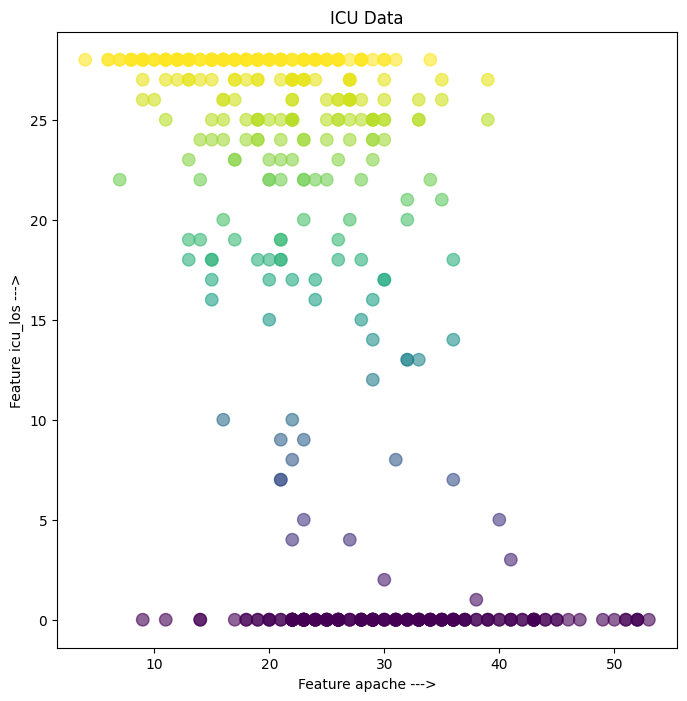

In [589]:
# plot group by colors
plt.figure(figsize=(8,8))
plt.scatter(X['apache'],y,c=y,s=80,alpha=0.6)
plt.xlabel('Feature apache --->')
plt.ylabel('Feature icu_los --->')
plt.title('ICU Data')

<Axes: >

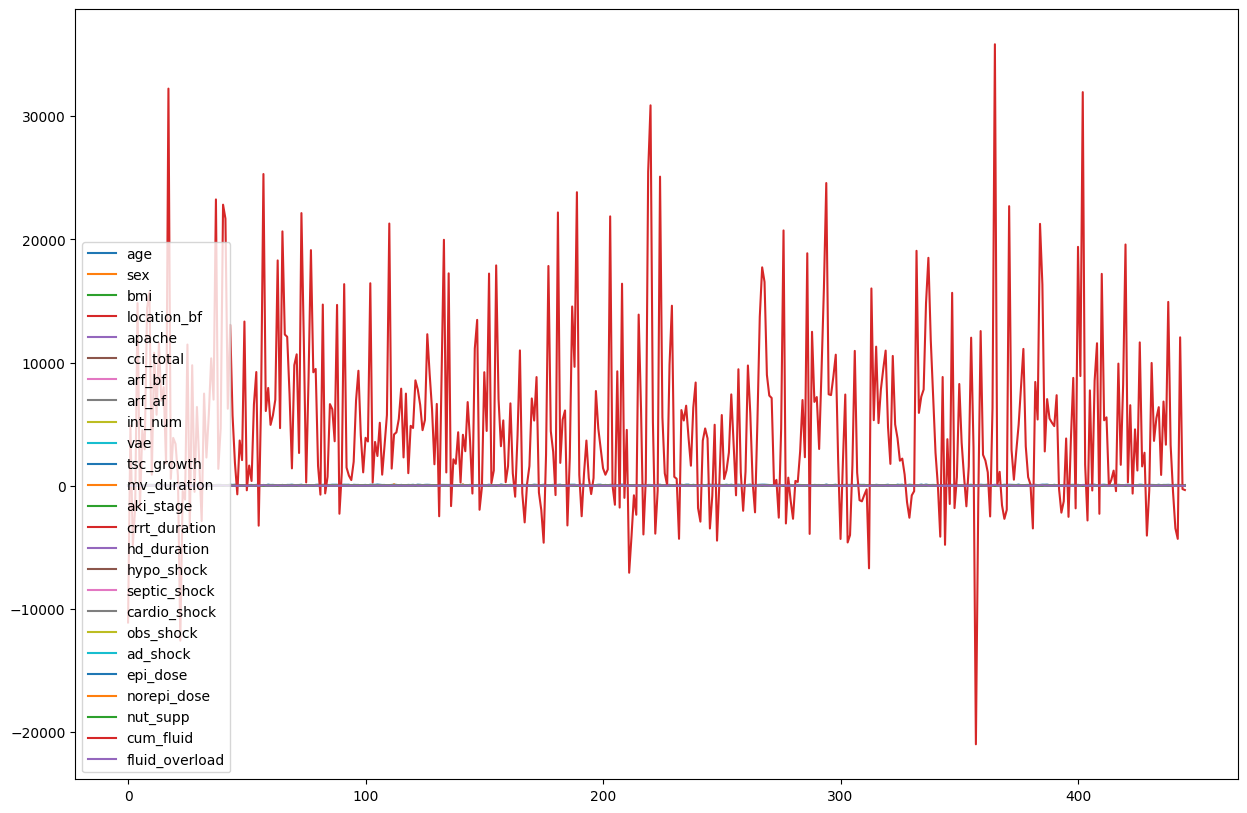

In [590]:
X.plot(figsize=(15, 10))

# Spliting data between train: test at ratio 70:30

In [591]:
X.shape,y.shape

((446, 25), (446,))

In [592]:
#Spliting data 30% as test / 70% as training
from sklearn.model_selection import train_test_split
seed = 6536115
# X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size = 0.3, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(312, 25) (134, 25) (312,) (134,)


<Axes: ylabel='Frequency'>

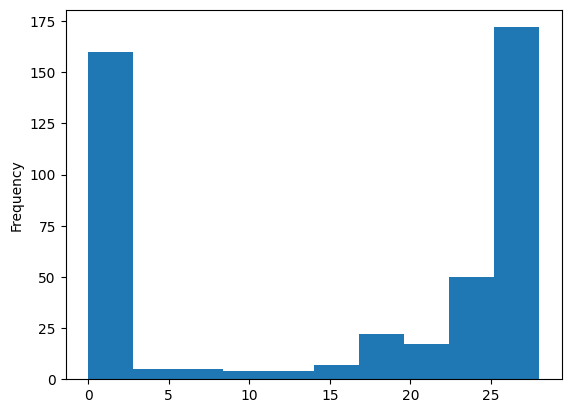

In [593]:
# 0 for Alive
# 1 for Death
y.plot(kind='hist')

<Axes: ylabel='Frequency'>

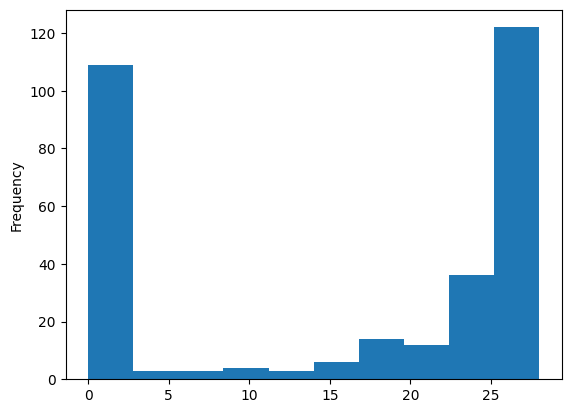

In [594]:
y_train.plot(kind='hist')

# Model

## Linear regression

In [597]:
from sklearn import linear_model  #เรียกใช้ sklearn
model = linear_model.LinearRegression()  #สร้าง model linear regression

In [598]:
model.fit(X_train, y_train)

LinearRegression()

In [599]:
y_pred = model.predict(X_test)
print("Accuracy score is: ",accuracy_score(np.array(y_test),y_pred.astype(int)))

Accuracy score is:  0.08955223880597014


## Decision tree

In [595]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [596]:
# create model using parameter from tune summary tune
grid_predictions = model.predict(X_test)
# sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True,fmt='d',)
print("Accuracy score is: ",accuracy_score(y_test,grid_predictions))
print("Recall score is: ",recall_score(y_test,grid_predictions))
print("F1 score is: ",f1_score(y_test,grid_predictions))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, grid_predictions)))
ConfusionMatrixDisplay(confusion_matrix(y_test, grid_predictions), display_labels=['Alive','Death']).plot()
print(classification_report(y_test, grid_predictions))

Accuracy score is:  0.7611940298507462


ValueError: ignored

## For Adaptive Boost, please set the number of stump = 10

### Adaptive Boost + DecisionTreeClassifier

In [549]:
from sklearn.tree import DecisionTreeClassifier

In [550]:
#tuning find the best paramter by GridSearchCV
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = {'max_depth':range(1,10),
                    'min_samples_leaf':range(1,5),
                    'criterion' : ['gini', 'entropy']}

# scores = ['accuracy','f1']
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

scores = {'accuracy': make_scorer(accuracy_score),
          'f1': make_scorer(f1_score)}

use gridesearch to find best hyperparameter

In [551]:
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()

  clf = GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 10509, 1: 68},random_state=0), cv = 10, param_grid=tuned_parameters, verbose=1, n_jobs=-1, scoring=score, return_train_score=True)
  clf.fit(X_train, y_train)

  print("Best parameters set found on development set:",score,clf.best_params_)
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std* 2, params))
  print()

# Tuning hyper-parameters for accuracy

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


ValueError: ignored

In [ ]:
# print best parameter after tuning
print("Best Score:", clf.best_score_,"using",clf.best_params_)
# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

In [ ]:
def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
      # if(type(p_v) == dict):
      #    p_v = str(p_v)
      masks.append(list(results['param_'+p_k].data==p_v))
    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        # for handle dict parameter such as class weight
        if(type(x[0]) == dict):
         x = [str(item) for item in x]
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [ ]:
plot_search_results(clf)

#### Calculate score before using adaboost

In [ ]:
# create model using parameter from tune summary tune
grid_predictions = clf.predict(X_test)
# sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True,fmt='d',)
print("Accuracy score is: ",accuracy_score(y_test,grid_predictions))
print("Recall score is: ",recall_score(y_test,grid_predictions))
print("F1 score is: ",f1_score(y_test,grid_predictions))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, grid_predictions)))
ConfusionMatrixDisplay(confusion_matrix(y_test, grid_predictions), display_labels=['Alive','Death']).plot()
print(classification_report(y_test, grid_predictions))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
accuracyAll = []
maxacc = [0,0]
for i in range(75):

  bdt = AdaBoostClassifier(clf.best_estimator_,algorithm="SAMME",n_estimators=i+1, random_state=0, learning_rate=1.0)
  bdt.fit(X_train, y_train)

  y_pred = bdt.predict(X_test)
  confusion = confusion_matrix(y_test,y_pred)

  accuracy = accuracy_score(y_test, y_pred)
  accuracyAll.append(accuracy)
  if(accuracy > maxacc[0]):
    maxacc[0] = accuracy
    maxacc[1] = i+1

print('Max accuracy',maxacc)
plt.figure(figsize=(8,8))
plt.plot(accuracyAll)

In [ ]:
preds = np.stack([tree.predict(X_test.to_numpy()) for tree in bdt.estimators_])

In [ ]:
print('iteration',maxacc[1],'provide highest score for accuracy score.')

In [ ]:
# import scipy.stats as stats
# plt.figure(figsize=(8,8))
# plt.plot([accuracy_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])
# plt.plot([f1_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])

iteration 8 provide highest score for f1 score.

In [ ]:
# Create and fit an AdaBoosteddecision tree
AdaDecision = AdaBoostClassifier(clf.best_estimator_,algorithm="SAMME",n_estimators=8, random_state=0, learning_rate=1.0)
AdaDecision.fit(X_train, y_train)

#### Report score for Decision tree + Adaboost

In [ ]:
y_predDtree = AdaDecision.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_predDtree))
print("Recall score is: ",recall_score(y_test,y_predDtree))
print("F1 score is: ",f1_score(y_test,y_predDtree))
print("Confusion Matrix:of Decision tree + Adaboost : \n",pd.DataFrame(confusion_matrix(y_test,y_predDtree)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predDtree), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_predDtree))

After using adaboost with decision tree f1 score was slighty increase from 0.578 to 0.667 due to false neg decrease from 14 to 11 and true pos increase from 13 to 16

## For GBT, please set learning rate = 0.1and number of tree = 10

In [488]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier()

### Use SMOTE

In [489]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 6536115)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
print('After SMOTE, the shape of train_X: {}'.format(X_train_SMOTE.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_SMOTE.shape))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_SMOTE == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_SMOTE == 0)))

After SMOTE, the shape of train_X: (360, 25)
After SMOTE, the shape of train_y: (360,) 

After SMOTE, counts of label '1': 180
After SMOTE, counts of label '0': 180


In [490]:
gbt_model.fit(X_train_SMOTE, y_train_SMOTE)

GradientBoostingClassifier()

Accuracy score is:  0.7835820895522388
Recall score is:  0.7368421052631579
F1 score is:  0.743362831858407
Confusion Matrix: 
     0   1
0  63  14
1  15  42
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        77
           1       0.75      0.74      0.74        57

    accuracy                           0.78       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.78      0.78      0.78       134



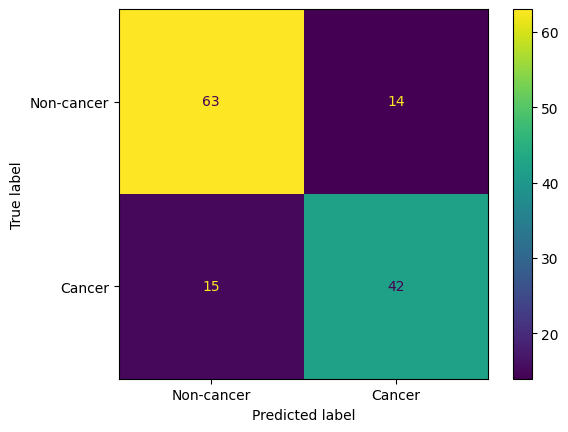

In [491]:
y_pred_gbt = gbt_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### use class weight

In [492]:
# gbt_model.fit(X_train, y_train, sample_weight=10509/68)
gbt_model.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy score is:  0.7686567164179104
Recall score is:  0.7192982456140351
F1 score is:  0.7256637168141592
Confusion Matrix: 
     0   1
0  62  15
1  16  41
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.73      0.72      0.73        57

    accuracy                           0.77       134
   macro avg       0.76      0.76      0.76       134
weighted avg       0.77      0.77      0.77       134



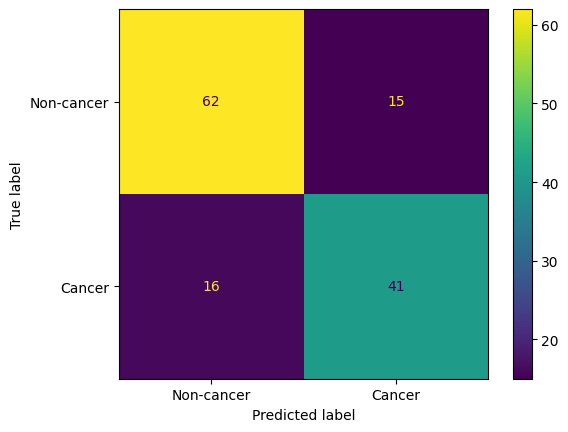

In [493]:
y_pred_gbt = gbt_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### Dicussion about GBT class weight and SMOTE
GBT model use class weight is better than use SMOTE due to confusion matrix show GBT with SMOTE data significantly increase false positive prediction from 5 to 76 number, which have 3 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.745(class weight) to 0.403(SMOTE)

## For XGBoost, please set λ = 0, γ = 1, Max depth = 6and ε = 0.3 and number of tree = 10

In [494]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(lamda=0, gamma=1, max_depth=6, eta=0.3, n_estimators=10,random_state=0)

### Use SMOTE

In [495]:
xgb_model.fit(X_train_SMOTE, y_train_SMOTE)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:58:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "lamda" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None, lamda=0,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, ...)

Accuracy score is:  0.7910447761194029
Recall score is:  0.7719298245614035
F1 score is:  0.7586206896551725
Confusion Matrix: 
     0   1
0  62  15
1  13  44
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        77
           1       0.75      0.77      0.76        57

    accuracy                           0.79       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.79      0.79      0.79       134



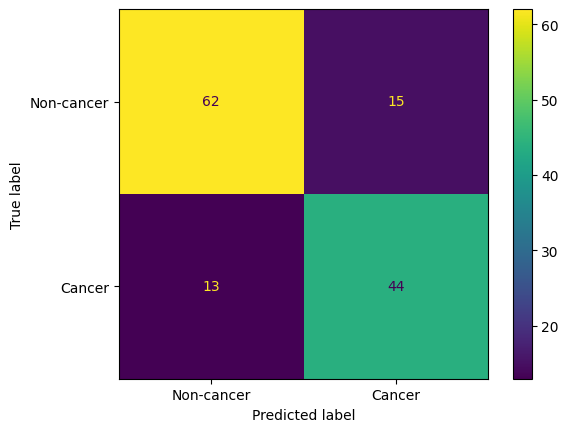

In [496]:
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

### without SMOTE

In [497]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:58:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "lamda" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None, lamda=0,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, ...)

Accuracy score is:  0.753731343283582
Recall score is:  0.7017543859649122
F1 score is:  0.7079646017699114
Confusion Matrix: 
     0   1
0  61  16
1  17  40
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        77
           1       0.71      0.70      0.71        57

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75      0.75      0.75       134



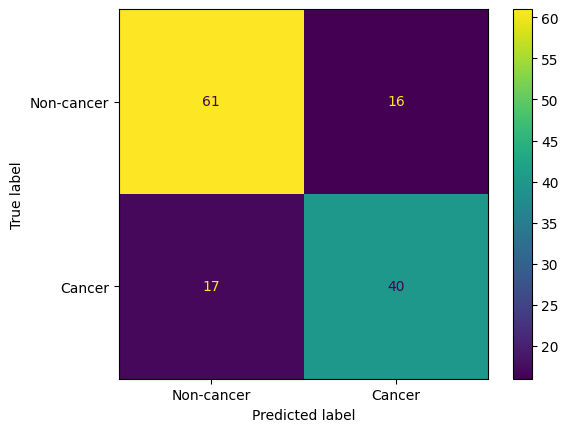

In [498]:
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

the same as GBT show XGBoost without SMOTE data is better due to confusion matrix show XGBoost with SMOTE data significantly increase false positive prediction from 7 to 55, which have 8 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.717(class weight) to 0.453(SMOTE)

## Finally, compare the performance of Adaptive Boost, Gradient Boost Tree, and XGBoostTree using appropriate metrics, selecting the best model and providing strong rationale for the choice.

### Result score Adaboost + Decision tree
- using adaboost + decesion tree is better than decesion tree alone  
- since using adaboost with decision tree f1 score was slighty increase from 0.578 to 0.667 due to false neg decrease from 14 to 11 and true pos increase from 13 to 16.

Accuracy score is:  0.7910447761194029
Recall score is:  0.631578947368421
F1 score is:  0.72
Confusion Matrix:of Decision tree + Adaboost : 
     0   1
0  70   7
1  21  36
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        77
           1       0.84      0.63      0.72        57

    accuracy                           0.79       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.80      0.79      0.79       134



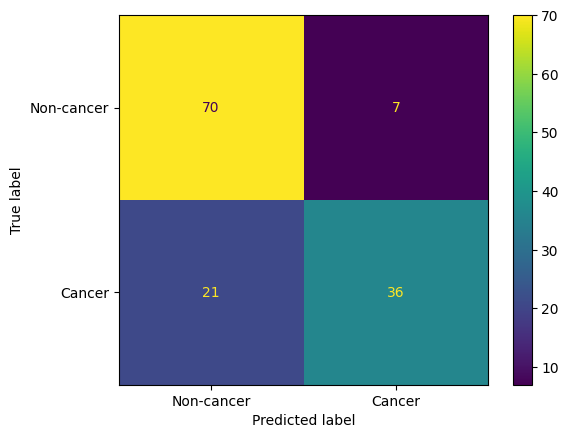

In [499]:
print("Accuracy score is: ",accuracy_score(y_test,y_predDtree))
print("Recall score is: ",recall_score(y_test,y_predDtree))
print("F1 score is: ",f1_score(y_test,y_predDtree))
print("Confusion Matrix:of Decision tree + Adaboost : \n",pd.DataFrame(confusion_matrix(y_test,y_predDtree)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predDtree), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_predDtree))

### Result score  GBT using class weight
- GBT model use class weight is better than use SMOTE due to confusion matrix show GBT with SMOTE data significantly increase false positive prediction from 5 to 76 number, which have 3 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.745(class weight) to 0.403(SMOTE)

Accuracy score is:  0.7686567164179104
Recall score is:  0.7192982456140351
F1 score is:  0.7256637168141592
Confusion Matrix: 
     0   1
0  62  15
1  16  41
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.73      0.72      0.73        57

    accuracy                           0.77       134
   macro avg       0.76      0.76      0.76       134
weighted avg       0.77      0.77      0.77       134



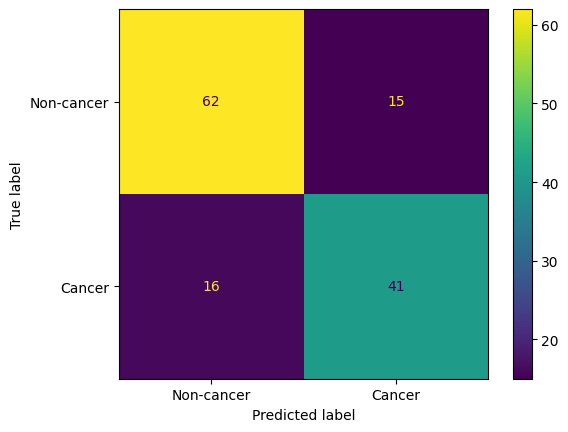

In [500]:
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### Result score  XGBoost without SMOTE
- the same as GBT show XGBoost without SMOTE data is better due to confusion matrix show XGBoost with SMOTE data significantly increase false positive prediction from 7 to 55, which have 8 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.717(class weight) to 0.453(SMOTE).

Accuracy score is:  0.753731343283582
Recall score is:  0.7017543859649122
F1 score is:  0.7079646017699114
Confusion Matrix: 
     0   1
0  61  16
1  17  40
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        77
           1       0.71      0.70      0.71        57

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75      0.75      0.75       134



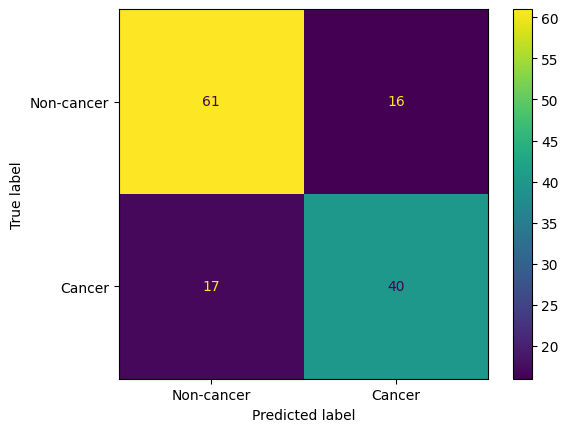

In [501]:
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

In [502]:
dfscore = pd.DataFrame({
    "Model": ["Adaboost with Decision tree","GBT using class weight","XGBoost without SMOTE"],
    "Accuracy": [accuracy_score(y_test,y_predDtree),accuracy_score(y_test,y_pred_gbt),accuracy_score(y_test,y_pred_xgb)],
    "Recall": [recall_score(y_test,y_predDtree),recall_score(y_test,y_pred_gbt),recall_score(y_test,y_pred_xgb)],
    "F1_score": [f1_score(y_test,y_predDtree),f1_score(y_test,y_pred_gbt),f1_score(y_test,y_pred_xgb)]
}).set_index('Model')
dfscore

,Accuracy,Recall,F1_score
Model,,,
Adaboost with Decision tree,0.791045,0.631579,0.720000
GBT using class weight,0.768657,0.719298,0.725664
XGBoost without SMOTE,0.753731,0.701754,0.707965


In [503]:
cfMatrixList = {"Adaboost + Decision tree":confusion_matrix(y_test, y_predDtree),
"GBT using class weight":confusion_matrix(y_test, y_pred_gbt),
"XGBoost without SMOTE":confusion_matrix(y_test, y_pred_xgb)}

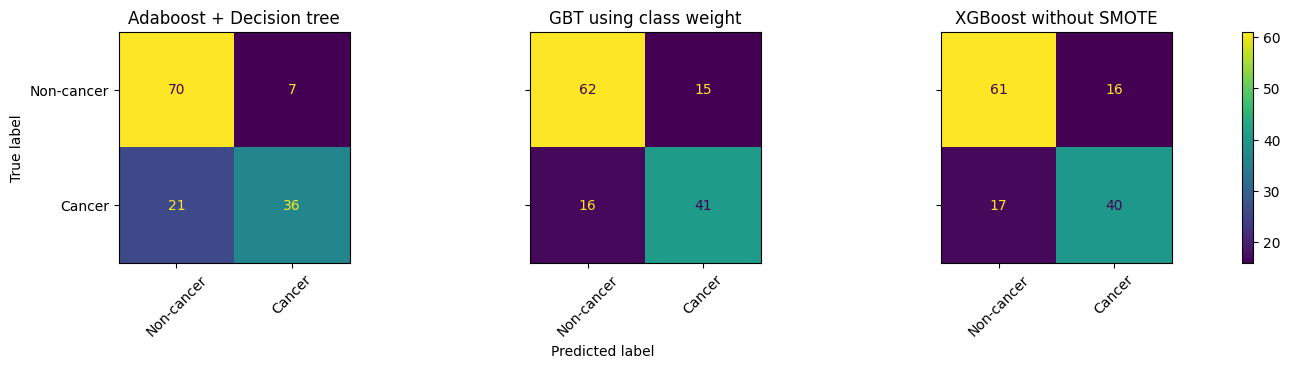

In [504]:
f, axes = plt.subplots(1, 3, figsize=(18, 3), sharey='row')

for i, (key, cf_matrix) in enumerate(cfMatrixList.items()):
    # y_pred = classifier.fit(X_train, y_train).predict(X_test)
    # cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['Non-cancer','Cancer'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, -0.2, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

### $\color{green} {Discussion}$

Due to Breat cancer dataset was an imbalance dataset we cannot use accuracy to evaluation, use f1 score instead.  
In result GBT with class weight was the best model. Since, the comparison result show GBT class weight get highest score for f1 = 0.745(while Adaboost with Decision tree get f1 0.667 and XGBoost without SMOTE show 0.717), also recall = 0.704 was the best as well. compare with Adaboost have recall 0.593 and XGBoost show  0.704 which equall to GBT but f1 was lower.

# Not use

### DateTime Adjust

In [ ]:
def preprocessDate(strDate):
  ddmmm = strDate[:5].upper()
  year = str(int(strDate[-4:]) - 543)
  adjustDate = ddmmm + year
  return adjustDate

In [ ]:
#adjust date time string to appropriate pattern
df['bdate'] = df['bdate'].apply(preprocessDate)
df['bdate'] = pd.to_datetime(df['bdate'], errors='raise')

In [ ]:
# create column cur_date
df['cur_date'] = "01JAN2023"
df['cur_date'] = pd.to_datetime(df['cur_date'], errors='raise')

In [ ]:
# create age year column
df['age_y'] = df['cur_date'].dt.year - df['bdate'].dt.year

In [ ]:
#remove unuse column
df.drop(['bdate','cur_date'], inplace=True, axis=1)
#display
df.info()
df